## CNN 

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5] ## 2d array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

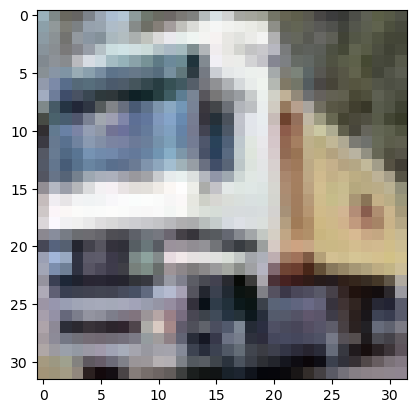

In [6]:
plt.imshow(X_train[1])

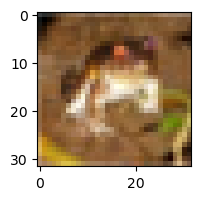

In [7]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[0])

In [8]:
y_train = y_train.reshape(-1,) ##-1 would leave sample nos untouched
y_train[:5] ## to convert 2d to 1d array

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_train.shape

(50000,)

In [10]:
y_test = y_test.reshape(-1,)

In [11]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
##fn with above
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]]) ## responsible for name

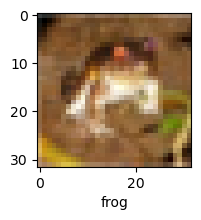

In [14]:
plot_sample(X_train, y_train, 0)

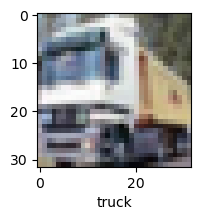

In [15]:
plot_sample(X_train, y_train, 1)

### Normalization

In [16]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [17]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [18]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [19]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 45s 29ms/step - loss: 1.8147 - accuracy: 0.3539
Epoch 2/5
1563/1563 [==============================] - 48s 31ms/step - loss: 1.6256 - accuracy: 0.4229
Epoch 3/5
1563/1563 [==============================] - 48s 30ms/step - loss: 1.5418 - accuracy: 0.4543
Epoch 4/5
1563/1563 [==============================] - 49s 32ms/step - loss: 1.4829 - accuracy: 0.4759
Epoch 5/5
1563/1563 [==============================] - 52s 33ms/step - loss: 1.4330 - accuracy: 0.4960


You can see that at the end of 5 epochs, accuracy is at around 48.48%

In [20]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 9ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.38      0.49      1000
           1       0.57      0.67      0.61      1000
           2       0.37      0.28      0.32      1000
           3       0.31      0.45      0.37      1000
           4       0.47      0.35      0.40      1000
           5       0.54      0.21      0.30      1000
           6       0.37      0.75      0.50      1000
           7       0.74      0.34      0.46      1000
           8       0.57      0.68      0.62      1000
           9       0.49      0.63      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.46     10000
weighted avg       0.51      0.47      0.46     10000



In [21]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [22]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 24s 15ms/step - loss: 1.4738 - accuracy: 0.4712
Epoch 2/5
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1189 - accuracy: 0.6105
Epoch 3/5
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9890 - accuracy: 0.6569
Epoch 4/5
1563/1563 [==============================] - 32s 20ms/step - loss: 0.9080 - accuracy: 0.6842
Epoch 5/5
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8423 - accuracy: 0.7080


With CNN, at the end 5 epochs, accuracy was at around 70.28% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [24]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9272 - accuracy: 0.6853


[0.9271792769432068, 0.6852999925613403]

In [25]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 7ms/step


array([[6.16454287e-03, 2.27594096e-03, 1.87489670e-03, 7.52724528e-01,
        4.94534383e-03, 1.57224134e-01, 4.29333001e-02, 1.96479508e-04,
        2.84033585e-02, 3.25746532e-03],
       [2.25266386e-02, 4.19248283e-01, 1.59043338e-04, 1.33749347e-06,
        6.61833269e-07, 5.58563222e-08, 2.94761975e-07, 4.00873361e-08,
        5.52810073e-01, 5.25367865e-03],
       [7.14003146e-02, 2.86109269e-01, 5.85344713e-03, 4.60233679e-03,
        2.44956114e-03, 1.04253285e-03, 6.31378498e-04, 3.20790941e-03,
        5.47808051e-01, 7.68951625e-02],
       [6.62855089e-01, 3.94407809e-02, 5.66758355e-03, 2.27619807e-04,
        1.24042612e-02, 2.36891610e-05, 1.70565880e-04, 9.45867287e-05,
        2.78356194e-01, 7.59594259e-04],
       [6.22229345e-05, 2.19270805e-05, 1.36482287e-02, 4.00455222e-02,
        2.85689890e-01, 1.57383382e-02, 6.43700063e-01, 3.05520516e-04,
        7.78147194e-04, 1.00595635e-05]], dtype=float32)

In [26]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [27]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

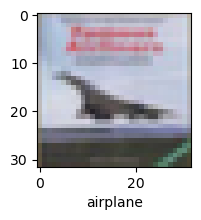

In [28]:
plot_sample(X_test, y_test,3)

In [29]:
classes[y_classes[3]]

'airplane'